<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D118~145p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **사이킷런으로 시작하는 머신러닝**
### **5. 데이터전처리**
* ML알고리즘은 데이터기반이라 사이킷런의 ML 알고리즘을 적용하기 전에 미리 데이터를 처리해야한다.
* NaN,Null값은 허용되지 않는다.
* 문자열값은 입력값이 될 수 없다. 모든 문자열값은 인코딩하여 숫자형으로 바꾼다. 
* 문자열피처=카테고리형피처+텍스트형피처(피처벡터화)
* 식별피처는 단순한 로우 식별용도이기 때문에 삭제하는게 좋다.
> #### 데이터 인코딩
* 레이블 인코딩: 카테고리피처를 코드형 숫자값으로 변환-LabelEncoder를 객체로 생성한 후 fit()과 transform()으로 레이블인코딩


In [37]:
from sklearn.preprocessing import LabelEncoder
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','믹서','믹서']
#LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder=LabelEncoder()
encoder.fit(items)
labels=encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 2 2]


In [38]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [39]:
print('디코딩 원본값:',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


* 레이블 인코딩은 선형회귀같은 ML알고리즘에 적용하면 숫자 가중치 오류가 발생할 수 있기 때문에 사용하지 않는다.
* ->원-핫 인코딩으로 해결

> #### 데이터 인코딩

* 원-핫 인코딩: 새로운 피처를 추가해 고유값에 해당하는 칼럼에 1을 표시, 나머지는0을 표시
* OneHotEncoder를 통해 변환, 문자열값이 숫자형으로 변하며 2차원데이터가 필요하다.

In [40]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 숫자 값 변환 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환
labels = labels.reshape(-1, 1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [41]:
import pandas as pd
df=pd.DataFrame({'item':['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)
#get_dummies()를 이용하면 숫자형 변환없이 바로 변환 가능하다.

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


> #### 피처 스케일링과 정규화
* 피처스케일링: 서로 다른 변수값 범위를 일정한 수준으로 맞추는 작업
>> * 표준화: 정규분포로 변환하는 것
>> * 정규화: 서로다른 피처크기를 통일하기 위해 크기 변환 
>> * Normalizer: 선형대수개념으로 개별벡터를 모든 피처벡터 크기로 나누어준다

> #### StandardScaler
* 표준화를 쉽게 지원하는 클래스. RBF커널을 이용하는 서포트벡터머신이나 선형회귀, 로지스틱 회귀는 데이터가 가우시안분포를 가지고 있다고 가정하였기 때문에 표준화를 적용하는건 중요한 요소이다.


In [42]:
from sklearn.datasets import load_iris
import pandas as pd
#붓꽃 데이터세트를 로딩하고 DataFrame 으로 변환한다.
iris=load_iris()
iris_data=iris.data
iris_df=pd.DataFrame(data=iris_data,columns=iris.feature_names)
print('feature들의 평균값')
print(iris_df.mean())
print('\nfeature들의 분산값')
print(iris_df.var())

feature들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


StandaraSclare객체생성후 fit()과 transform()에 피처데이터세트를 입력하고 호출한다. transform()을 호출할때 스케일 변환 세트가 ndarray이므로 DataFrame으로 변환한다.

In [43]:
from sklearn.preprocessing import StandardScaler

#standardsclaer 객체생성
scaler=StandardScaler()
#StandardScaler로 데이터세트 변환. fit()과 transform()호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform( )시 스케일변환세트가 Numpy ndarray 로 반환돼 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print('feature들의 평균값')
print(iris_df_scaled.mean())
print('\nfeature들의 분산값')
print(iris_df_scaled.var())

feature들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


> #### MinMaxSclaer
* 데이터값을 0과1사이 값으로 변환
* 데이터분포가 가우시안 분포가 아닐때 적용할 수 있다.

In [44]:
from sklearn.preprocessing import MinMaxScaler

#MinMaxScaler 객체 생성
scaler=MinMaxScaler()
#MinMaxScaler로 데이터 세트 변환, fit(),transform()호출
scaler.fit(iris_df)
iris_scaled=scaler.transform(iris_df)

#transform()시 스케일 변환된 데이터세트가 Numpy ndarray 로 반환돼 이를 DataFrame으로 변환
iris_df_scaled=pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


> #### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
* scaler객체를 이용해 스케일링 변환시 fit(),transfrom(),fit_transform() 메소드를 이용한다.
* 학습데이터세트로 fit()을 수행한 결과를 이용해 transform() 반환을 적용한다.

In [45]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
#Scaler 클래스의 fit(),transform()은 2차원 이상 데이터만 가능하므로 reshape(-1,1)로 차원 변경
train_array=np.arange(0,11).reshape(-1,1)
test_array=np.arange(0,6).reshape(-1,1)


In [46]:
#train_array부터 MinMaxScaler를 이용해 변환, 1/10 scale이 적용된다.
#MinMaxSclaer객체에 별도의 feature_range파라미터 값을 지정하지 않으면 0~1값으로 변환
scaler=MinMaxScaler()

#fit()하게되면 train_array 데이터 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

#1/10scale로 train_array 데이터 변환/ 원본10->1로 변환
train_scaled=scaler.transform(train_array)

print('원본 train_array 데이터:',np.round(train_array.reshape(-1),2))
print('Scale된 train_array데이터:',np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [48]:
#fit()을 호출하여 스케일링 기준정보를 다시 적용한 뒤 transform() 수행행
#MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

#1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled=scaler.transform(test_array)

#test_array의 scale변환 출력
print('원본 test_array데이터:',np.round(test_array.reshape(-1),2))
print('Scale된 test_array데이터:',np.round(test_scaled.reshape(-1),2))

원본 test_array데이터: [0 1 2 3 4 5]
Scale된 test_array데이터: [0.  0.2 0.4 0.6 0.8 1. ]


* 학습데이터와 테스트데이터의 스케일링이 맞지 않는다. 학습데이터와 테스트데이터의 서로다른 원본값이 동일값으로 변환되는 결과 초래. 
* fit()를 호출하지 않고 학습데이터로 fit()을 수행한 MinMaxScaler객체의 transform()을 이용해 데이터 변환. 

In [49]:
 scaler=MinMaxScaler()
 scaler.fit(train_array)
 train_scaled=scaler.transform(train_array)
 print('원본 train_array데이터:',np.round(train_array.reshape(-1),2))
 print('scale된 train_array데이터:',np.round(train_scaled.reshape(-1),2))

 #test_array에 Scale변환할때는 fit()을 호출하지않고 transform()만 변환해야함.
 test_scaled=scaler.transform(test_array)
 print('\n원본 test_array 데이터:',np.round(test_array.reshape(-1),2))
 print('Scale된 test_array데이터:',np.round(test_scaled.reshape(-1),2))

원본 train_array데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array데이터: [0.  0.1 0.2 0.3 0.4 0.5]


* fit_transform()는 테스트데이터에서 사용해선 안된다. 
* 전체데이터 스케일링변환후 학습과 테스트데이터로 분리
* fit()이나 fit_transform()을 적용하지않고 학습데이터로 fit()된 Scaler객체를 이용해 transform()으로 변환

### **5. 사이킷런으로 수행하는 타이타닉 생존자 예측**
타이타닉 탑승자 데이터
* passengerid: 탑승자 데이터 일련번호
* survived: 생존여부,0=사망,1=생존
* pclass: 티켓의 선실 등급. 1=1등석 2=2등석 3=3등석
* sex: 탑승자 성별
* name: 탑승자 이름
* age: 탑승자 나이이
* sibsp: 같이 탑승한 형제자매 또는 배우자 인원 수
* parch:같이 탑승한 부모님 또는 어린이 인원 수
* ticket: 티켓 번호
* fare:요금
* cabin: 선실 번호
* embarked: 중간 정착 항구 C=Cherbourg,Q=Queenstown,S=Southampton


In [5]:
from google.colab import files
file_uploaded = files.upload()

Saving train.csv to train (1).csv


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_df=pd.read_csv('train.csv') 
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
print('\n ### 학습데이터정보 ### \n')
print(titanic_df.info())


 ### 학습데이터정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
#사이킷 머신러닝 알고리즘은 NUll값을 허용하지 않으므로 fillna함수를 통해 평균또는 고정값으로 변경경
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터세트 Null 값 개수',titanic_df.isnull().sum().sum())


데이터세트 Null 값 개수 0


In [10]:
print('Sex값 분포:\n',titanic_df['Sex'].value_counts())
print('\n Cabin값 분포:\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n',titanic_df['Embarked'].value_counts())

Sex값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin값 분포:
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


* Cabin의 N값이 687건으로 가장 많고 Cabin이 한꺼번에 표기된 Cabin값이 4건.
* Cabin의 앞문자만 추출하기기

In [11]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [13]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

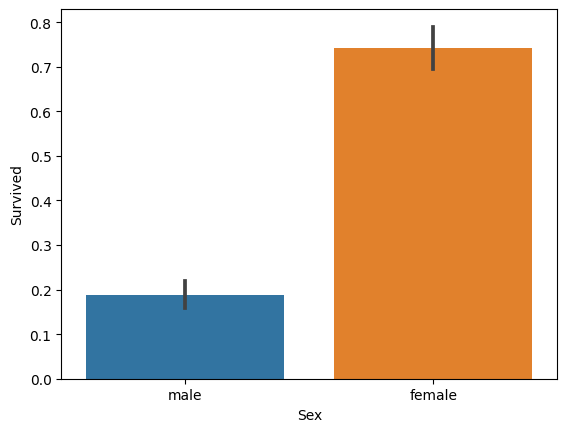

In [15]:
# 그래프로 사망자 확인
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

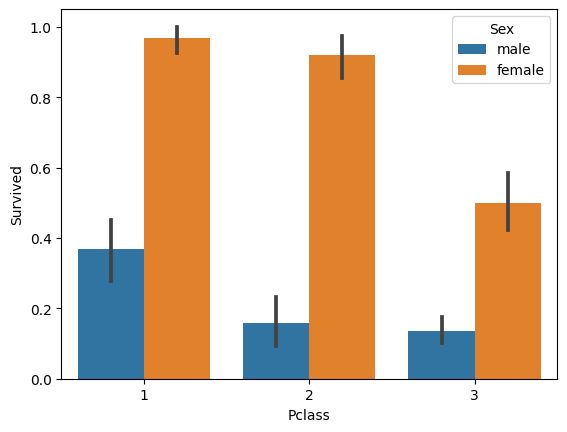

In [17]:
#부자와 가난한사람들간 생존확률 그래프-성별로 구분
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

In [21]:
#Age에 따른 생존확률 알아보기
#입력 age에 따라 구분값을 반환하는 함수설정. DataFrame의 apply lambda식에 사용.
def get_category(age):
  cat=''
  if age<=-1: cat='Unknown'
  elif age<=5: cat='Baby'
  elif age<=12: cat='Child'
  elif age<=18: cat='Teenager'
  elif age<=25: cat='Student'
  elif age<=35: cat='Yound Adult'
  elif age<=60: cat='Adult'
  else :cat='Elderly'

  return cat

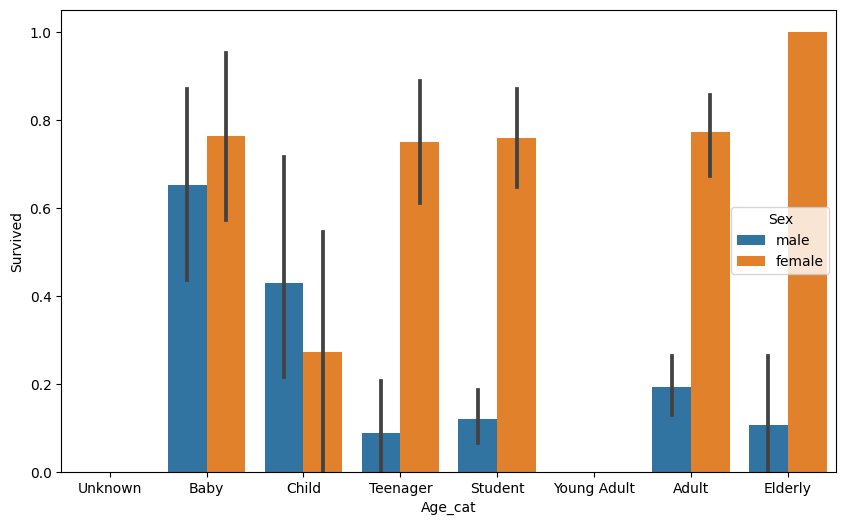

In [25]:
#막대그래프의 크기 figure를 더 크게설정
plt.figure(figsize=(10,6))
#X축의 값을 순차적으로 표시하기위한 설정
group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
# lambda 식에 위에서생성한 get_category()함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age'칼럼값을 받아서 해당하는 Cat반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

* 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환, 인코딩은 사이킷런의 LabelEncoder클래스를 이용해 레이블 인코딩적용

In [26]:
from sklearn import preprocessing

def encode_features(dataDF):
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit(dataDF[feature])
    dataDF[feature]=le.transform(dataDF[feature])
  return dataDF
titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [27]:
#데이터 전처리를 전체적으로 호출하는 함수는 transform_features()이다.

#Null 처리함수수
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna('N',inplace=True)
  df['Embarked'].fillna('N',inplace=True)
  df['Fare'].fillna(0,inplace=True)

  return df

#머신러닝 알고리즘에 불필요한 속성제거
def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
  return df

#레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le=LabelEncoder()
    le=le.fit(df[feature])
    df[feature]=le.transform(df[feature])

  return df

#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [31]:
#원본 csv파일을 다시로딩하고 survived속성만 별도분리해 클래스결정값 데이터세트로 만들기
#survived속성을 드롭해 피처데이터세트 만들기
#이 데이터세트에 transform_features()를 적용해 데이터가공
from sklearn.preprocessing import LabelEncoder
#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df=pd.read_csv('train.csv')
y_titanic_df=titanic_df['Survived']
X_titanic_df=titanic_df.drop('Survived',axis=1)

X_titanic_df=transform_features(X_titanic_df)

In [32]:
# train_test_split() API 이용해 테스트데이터세트 추출출
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

* ML알고리즘인 결정트리, 랜덤포레스트, 로지스틱 회귀를 이용해 타이타닉 생존자 예측
* 이들 사이킷런 클래스를 이용해 train_test_split()으로 분리한 학습데이터와 테스트데이터로 머신러닝 모델 학습(fit)하고 예측한다.-accuracy_score() API사용

In [33]:
#예측 성능평가 :정확도
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, 랜덤포레스트, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf=DecisionTreeClassifier(random_state=11)
rf_clf=RandomForestClassifier(random_state=11)
lr_clf=LogisticRegression()


dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
print('DecisionTreecClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))


#RandomForestClassifier 학습/예측/평가

rf_clf.fit(X_train,y_train)
rf_pred=rf_clf.predict(X_test)
print('RandomForestClassifier 정확도{0:.4f}'.format(accuracy_score(y_test,rf_pred)))

#로지스틱회귀 학습/예측/평가
lr_clf.fit(X_train,y_train)
lr_pred=lr_clf.predict(X_test)
print('LogisticRegression 정확도{0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreecClassifier 정확도:0.7877
RandomForestClassifier 정확도0.8547
LogisticRegression 정확도0.8492


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* LogisticRegression이 높은 정확도를 나타낸다. 
* 교차검증으로 결정트리모델 평가하기

In [34]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
  # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성
  kfold=KFold(n_splits=folds)
  scores=[]

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions=clf.predict(X_test)
    accuracy=accuracy_score(y_test,predictions)
    scores.append(accuracy)
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))

    # 5개 fold에서의 평균 정확도 계산.
    mean_score=np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도: 0.7542
평균 정확도: 0.7542
교차 검증 1 정확도: 0.7809
평균 정확도: 0.7675
교차 검증 2 정확도: 0.7865
평균 정확도: 0.7739
교차 검증 3 정확도: 0.7697
평균 정확도: 0.7728
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [35]:
#교차검증을 cross_val_score() API를 이용해 수행
from sklearn.model_selection import cross_val_score

scores=cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:4f}'.format(iter_count,accuracy))


print("평균 정확도: {0:.4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.743017
교차 검증 1 정확도: 0.775281
교차 검증 2 정확도: 0.792135
교차 검증 3 정확도: 0.786517
교차 검증 4 정확도: 0.842697
평균 정확도: 0.7879


* K 폴드의 평균 정확도는 cross_val_score()과 다른데, StratifiedKFold를 이용해 폴드세트를 분할하기 때문이다.

In [36]:
#GridSearchCV를 이용해 DecisionTreeClassifier의 최적 하이퍼 파라미터를 찾고 예측성능 측정하기기
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy',cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy))


GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도: 0.8715


* 예측 정확도가 87.15%로 향상. 테스트용데이터세트가 작기때문에 예측성능이 증가한것으로 보임.